In [47]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

### perceptron 

In [83]:
# iris data 
d = pd.read_csv('Iris.csv')
x = d[d.columns[1: -1]]
x.columns = ['sepallen', 'sepalwid', 'petallen', 'petalwid']
mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y = d[d.columns[-1]].replace(mapping)

# only consider two features first 
# slcie for the binary data {0, 1}
x2 = x[y != 1][['sepallen', 'sepalwid']]
y2 = y[y != 1]

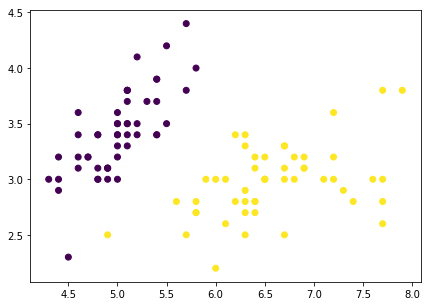

In [75]:
plt.figure(figsize = (7, 5))

plt.scatter(x2.iloc[:,0], x2.iloc[:,1], c = y2)

In [114]:
def perceptron_sgd(X, y,  add_bias = False):
    # x and y have to be np arrays   
    if add_bias:
        # add bais temrs to the weight vector 
        bias = np.ones(X.shape[0]).reshape(X.shape[0], 1)
        X = np.hstack((X, bias))

    
    w = np.zeros(len(X[0]))
    eta = 0.4
    epochs = 1000

    for epoch in range(epochs):
        for i in range(X.shape[0]):
            if (np.dot(X[i], w)* y[i]) <= 0:
                w = w + eta*X[i]* y[i]

    return w

In [115]:
weights = perceptron_sgd(x2.values, y2.values, add_bias = True)
weights

array([ 5.04,  2.64,  0.8 ])

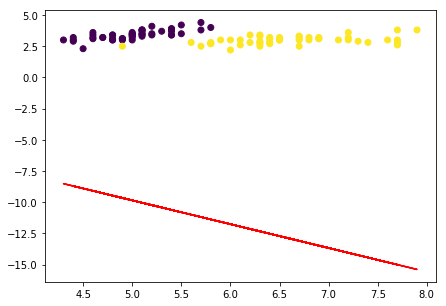

In [119]:
# plot hyperplane 

plt.figure(figsize = (7, 5))
# training sample
plt.scatter(x2.iloc[:,0], x2.iloc[:,1], c = y2)

w1 = weights[0]
w2 = weights[1]
w3 = weights[2]

# plot the hyperplane function - one feature one axis 
def hype(x2):
    return -(w3/ w2) - (w1/ w2)*x2.iloc[:, 0]   

# # hyperplane 
# plt.plot((0, - w3/ w2), (- w3/ w1, 0))  
plt.plot(x2.iloc[:, 0], hype(x2), c = 'r')


In [79]:
# accuracy 
final = np.dot(np.hstack((x2, np.ones((x2.shape[0], 1)))), weights)* y2

# prediction is incorrect when final is less than zero

In [80]:
sum(final < 0)

0

In [123]:
X[:, 0]

array([-2,  4,  1,  2,  6])

### compare with scikit learn perceptron 

In [87]:
from sklearn.linear_model import perceptron

sktp = perceptron.Perceptron(n_iter = 1000, verbose=0, random_state = None, fit_intercept=True)
sktp.fit(x2, y2)
 
# Print the results
# print ("Prediction: " + str(sktp.predict(x2)))
# print ("Actual: " + str(y2))
print ("Accuracy: " + str(sktp.score(x2, y2)*100) + "%")
print ('scikit-learn weights{0}{1} :'.format(sktp.intercept_, sktp.coef_))

Accuracy: 100.0%
scikit-learn weights[-50.][[ 49.1 -74.6]] :


/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


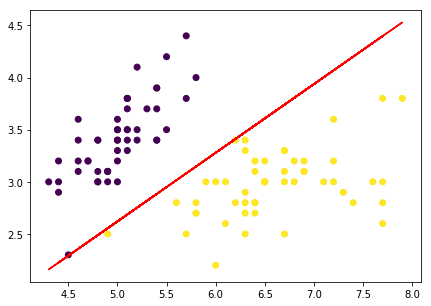

In [102]:
# plot the decision boundary
# perceptron decision function is sgn(w1*x1 + w2*x2 + w3) then the decision boundary equation is a line with canonical form w1*x1 + w2*x2 + w3 = 0.
# to plot such equation: draw a line through (0,-w3/w2) and (-w3/w1,0) (assuming that both w1 and w2 are non-zero)


plt.figure(figsize = (7, 5))
# training sample
plt.scatter(x2.iloc[:,0], x2.iloc[:,1], c = y2)

w1 = sktp.coef_[0][0]
w2 = sktp.coef_[0][1]
w3 = sktp.intercept_

# plot the hyperplane function - one feature one axis 
def hype(x2):
    return -(w3/ w2) - (w1/ w2)*x2.iloc[:, 0]   

# hyperplane 
# plt.plot((0, - w3/ w2), (- w3/ w1, 0))  
plt.plot(x2.iloc[:, 0], hype(x2), c = 'r')

# def hype(x,v):
#     return (-w1*x2.iloc[:, 0]-w3+v) / w2

# plt.plot(x2.iloc[:, 0], hype(x2, 0), c = 'r')


### from perceptron to NN